In [2]:
import os

src_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(src_path)

from src.seacast_tools.np_loaders import TargetsFromNumpy, PredictionsFromNumpy
from weatherbenchX.metrics import deterministic
from weatherbenchX.metrics import base as metrics_base
from weatherbenchX import aggregation
from matplotlib.colors import Normalize
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [3]:
def flatten_to_2d(datos, mask, shape=(300, 300)):
    mask = mask.flatten()
    temperature_map = np.zeros_like(mask, dtype=float)

    j = 0
    for i in range(len(mask)):
        if mask[i] == 1:
            temperature_map[i] = datos[j]
            j += 1

    return temperature_map.reshape(shape)

def plot_temperature_map(temperature_map, cmap="inferno"):
    plt.figure(figsize=(6, 6))

    norm = Normalize(vmin=np.min(temperature_map[temperature_map != 0]),
                        vmax=np.max(temperature_map))
    plt.imshow(temperature_map, cmap=cmap, origin='lower', norm=norm)

    plt.colorbar(label="Temperatura")
    plt.title("Mapa de Temperatura")
    plt.show()

mask = np.load("data/atlantic/static/sea_mask.npy")

### Diccionario métricas

In [4]:
dict_metric_names = {
    "rmse.sst_temperature": "RMSE",
    "mae.sst_temperature": "MAE",
    "bias.sst_temperature": "Sesgo",
}

metric_names = list(dict_metric_names.keys())

### Carga datos reales

In [4]:
variables = ["sst_temperature"]
directory = r"data\atlantic\samples\test"
extra_variables = ["coordinates", "mask"]
extra_files = [r"data\atlantic\static\coordinates.npy", r"data\atlantic\static\sea_mask.npy"]

In [ ]:
targets = TargetsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

targets_dataset = targets.load_chunk()

#targets_dataset.astype(np.float32).to_netcdf("data/atlantic/predictions/targets_dataset.nc")

In [5]:
targets_dataset = xr.open_dataset("data/atlantic/predictions/targets_dataset.nc")

targets_dataset

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_12972\3169297728.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  targets_dataset = xr.open_dataset("data/atlantic/predictions/targets_dataset.nc")


<xarray.Dataset> Size: 5GB
Dimensions:          (init_time: 714, lead_time: 15, latitude: 300,
                      longitude: 300)
Coordinates:
  * latitude         (latitude) float64 2kB 19.57 19.62 19.68 ... 34.48 34.52
  * longitude        (longitude) float64 2kB -20.93 -20.88 ... -6.025 -5.975
  * init_time        (init_time) datetime64[ns] 6kB 2022-01-02 ... 2023-12-16
  * lead_time        (lead_time) timedelta64[ns] 120B 1 days 2 days ... 15 days
    mask             (init_time, lead_time, latitude, longitude) bool 964MB ...
    valid_time       (init_time, lead_time) datetime64[ns] 86kB ...
Data variables:
    sst_temperature  (init_time, lead_time, latitude, longitude) float32 4GB ...

### Cargando resultados unificados ensemble gaussiano (std 0.1)

In [7]:
directory = r"data\atlantic\predictions\gaussian\unified\mean"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset_gaussian_mean = pred_loader.load_chunk()

predictions_dataset_gaussian_mean.astype(np.float32).to_netcdf("data/atlantic/predictions/predictions_dataset_gaussian_mean.nc")

Loaded 714 data entries from data\atlantic\predictions\gaussian\unified\mean


In [9]:
predictions_dataset_gaussian_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_gaussian_mean.nc")

predictions_dataset_gaussian_mean

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_15344\1524841561.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  predictions_dataset_gaussian_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_gaussian_mean.nc")


<xarray.Dataset> Size: 5GB
Dimensions:          (init_time: 714, lead_time: 15, latitude: 300,
                      longitude: 300)
Coordinates:
  * latitude         (latitude) float64 2kB 19.57 19.62 19.68 ... 34.48 34.52
  * longitude        (longitude) float64 2kB -20.93 -20.88 ... -6.025 -5.975
  * init_time        (init_time) datetime64[ns] 6kB 2022-01-02 ... 2023-12-16
  * lead_time        (lead_time) timedelta64[ns] 120B 1 days 2 days ... 15 days
    mask             (init_time, lead_time, latitude, longitude) bool 964MB ...
Data variables:
    sst_temperature  (init_time, lead_time, latitude, longitude) float32 4GB ...

### Cargando resultados unificados ensemble gaussiano (std 0.01)

In [6]:
directory = r"data\atlantic\predictions\gaussian_01\unified\mean"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset_gaussian_01_mean = pred_loader.load_chunk()

predictions_dataset_gaussian_01_mean.astype(np.float32).to_netcdf("data/atlantic/predictions/predictions_dataset_gaussian_01_mean.nc")

Loaded 714 data entries from data\atlantic\predictions\gaussian_01\unified\mean


In [7]:
predictions_dataset_gaussian_01_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_gaussian_01_mean.nc")

predictions_dataset_gaussian_01_mean

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_18148\641827678.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  predictions_dataset_gaussian_01_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_gaussian_01_mean.nc")


<xarray.Dataset> Size: 5GB
Dimensions:          (init_time: 714, lead_time: 15, latitude: 300,
                      longitude: 300)
Coordinates:
  * latitude         (latitude) float64 2kB 19.57 19.62 19.68 ... 34.48 34.52
  * longitude        (longitude) float64 2kB -20.93 -20.88 ... -6.025 -5.975
  * init_time        (init_time) datetime64[ns] 6kB 2022-01-02 ... 2023-12-16
  * lead_time        (lead_time) timedelta64[ns] 120B 1 days 2 days ... 15 days
    mask             (init_time, lead_time, latitude, longitude) bool 964MB ...
Data variables:
    sst_temperature  (init_time, lead_time, latitude, longitude) float32 4GB ...

### Cargando resultados unificados ensemble perlin fractal

In [6]:
directory = r"data\atlantic\predictions\perlin_fractal\unified\mean"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset_perlin_fractal_mean = pred_loader.load_chunk()

predictions_dataset_perlin_fractal_mean.astype(np.float32).to_netcdf("data/atlantic/predictions/predictions_dataset_perlin_fractal_mean.nc")

Loaded 714 data entries from data\atlantic\predictions\perlin_fractal\unified\mean


In [ ]:
predictions_dataset_perlin_fractal_mean

In [7]:
predictions_dataset_perlin_fractal_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_perlin_fractal_mean.nc")

predictions_dataset_perlin_fractal_mean

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_12972\3171935483.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  predictions_dataset_perlin_fractal_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_perlin_fractal_mean.nc")


<xarray.Dataset> Size: 5GB
Dimensions:          (init_time: 714, lead_time: 15, latitude: 300,
                      longitude: 300)
Coordinates:
  * latitude         (latitude) float64 2kB 19.57 19.62 19.68 ... 34.48 34.52
  * longitude        (longitude) float64 2kB -20.93 -20.88 ... -6.025 -5.975
  * init_time        (init_time) datetime64[ns] 6kB 2022-01-02 ... 2023-12-16
  * lead_time        (lead_time) timedelta64[ns] 120B 1 days 2 days ... 15 days
    mask             (init_time, lead_time, latitude, longitude) bool 964MB ...
Data variables:
    sst_temperature  (init_time, lead_time, latitude, longitude) float32 4GB ...

### Cargando resultados unificados ensemble perlin 3 3

In [ ]:
directory = r"data\atlantic\predictions\perlin 3d 3_3\unified\mean"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset_perlin_3d_3_3_mean = pred_loader.load_chunk()

predictions_dataset_perlin_3d_3_3_mean.astype(np.float32).to_netcdf("data/atlantic/predictions/predictions_dataset_perlin_3d_3_3_mean.nc")

In [ ]:
predictions_dataset_perlin_3d_3_3_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_perlin_3d_3_3_mean.nc")

predictions_dataset_perlin_3d_3_3_mean

### Cargando resultados unificados ensemble perlin 3d 12 12

In [ ]:
directory = r"data\atlantic\predictions\perlin 3d 12_12\unified\mean"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset_perlin_3d_12_12_mean = pred_loader.load_chunk()

predictions_dataset_perlin_3d_12_12_mean.astype(np.float32).to_netcdf("data/atlantic/predictions/predictions_dataset_perlin_3d_12_12_mean.nc")

In [ ]:
predictions_dataset_perlin_3d_12_12_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_perlin_3d_12_12_mean.nc")

predictions_dataset_perlin_3d_12_12_mean

### Cargando resultados unificados ensemble perlin fractal 2d 005

In [ ]:
directory = r"data\atlantic\predictions\perlin_fractal_2d_005\unified\mean"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset_perlin_fractal_2d_005_mean = pred_loader.load_chunk()

predictions_dataset_perlin_fractal_2d_005_mean.astype(np.float32).to_netcdf("data/atlantic/predictions/predictions_dataset_perlin_fractal_2d_005_mean.nc")

In [ ]:
predictions_dataset_perlin_fractal_2d_005_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_perlin_fractal_2d_005_mean.nc")
predictions_dataset_perlin_fractal_2d_005_mean

### Cargando resultados predicción datos sin ruido

In [ ]:
directory = r"data\atlantic\predictions\without_noise\run-20250528_165845-uvgfnd2l\files\predictions"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset_without_noise_mean = pred_loader.load_chunk()

predictions_dataset_without_noise_mean.astype(np.float32).to_netcdf("data/atlantic/predictions/predictions_dataset_without_noise_mean.nc")

In [7]:
predictions_dataset_without_noise_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_without_noise_mean.nc")
predictions_dataset_without_noise_mean

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_7064\106317359.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  predictions_dataset_without_noise_mean = xr.open_dataset("data/atlantic/predictions/predictions_dataset_without_noise_mean.nc")


<xarray.Dataset> Size: 5GB
Dimensions:          (init_time: 714, lead_time: 15, latitude: 300,
                      longitude: 300)
Coordinates:
  * latitude         (latitude) float64 2kB 19.57 19.62 19.68 ... 34.48 34.52
  * longitude        (longitude) float64 2kB -20.93 -20.88 ... -6.025 -5.975
  * init_time        (init_time) datetime64[ns] 6kB 2022-01-02 ... 2023-12-16
  * lead_time        (lead_time) timedelta64[ns] 120B 1 days 2 days ... 15 days
    mask             (init_time, lead_time, latitude, longitude) bool 964MB ...
Data variables:
    sst_temperature  (init_time, lead_time, latitude, longitude) float32 4GB ...

### Definiendo métricas

In [8]:
metrics = {
  'rmse': deterministic.RMSE(),
  'mae': deterministic.MAE(),
  'bias': deterministic.Bias()
}

### Calculo estadísticas

#### Gausiano (std 0.1)

In [10]:
statistics_gaussian = metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset_gaussian_mean, targets_dataset
)

#### Gausiano (std 0.01)

In [9]:
statistics_gaussian_01 = metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset_gaussian_01_mean, targets_dataset
)

#### Perlin Fractal

In [9]:
statistics_perlin_fractal = metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset_perlin_fractal_mean, targets_dataset
)

#### Perlin 3_3

In [ ]:
statistics_perlin_3d_3_3= metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset_perlin_3d_3_3_mean, targets_dataset
)

#### Perlin 12_12

In [ ]:
statistics_perlin_3d_12_12 = metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset_perlin_3d_12_12_mean, targets_dataset
)

#### Perlin Fractal 2d 005

In [ ]:
statistics_perlin_fractal_2d_005 = metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset_perlin_fractal_2d_005_mean, targets_dataset
)

#### Sin ruido

In [9]:
statistics_without_noise = metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset_without_noise_mean, targets_dataset
)

In [11]:
aggregator = aggregation.Aggregator(
  reduce_dims=["latitude", "longitude"], skipna=True
)

### Cálculo métricas

#### Gausiano (0.1 std)

In [13]:
aggregation_statistics_gaussian = aggregator.aggregate_statistics(statistics_gaussian)
dataset_metrics_gaussian = aggregation_statistics_gaussian.metric_values(metrics)
dataset_metrics_gaussian["lead_time"] = dataset_metrics_gaussian["lead_time"].astype("timedelta64[D]")

dataset_metrics_gaussian.astype(np.float32).to_netcdf(f"data/atlantic/predictions/metrics_ensemble_gaussian_mean.nc")

#### Gausiano (0.01 std)

In [12]:
aggregation_statistics_gaussian_01 = aggregator.aggregate_statistics(statistics_gaussian_01)
dataset_metrics_gaussian_01 = aggregation_statistics_gaussian_01.metric_values(metrics)
dataset_metrics_gaussian_01["lead_time"] = dataset_metrics_gaussian_01["lead_time"].astype("timedelta64[D]")

dataset_metrics_gaussian_01.astype(np.float32).to_netcdf(f"data/atlantic/predictions/metrics_ensemble_gaussian_01_mean.nc")

#### Perlin Fractal (1x3x3)

In [12]:
aggregation_statistics_perlin_fractal = aggregator.aggregate_statistics(statistics_perlin_fractal)
dataset_metrics_perlin_fractal = aggregation_statistics_perlin_fractal.metric_values(metrics)
dataset_metrics_perlin_fractal["lead_time"] = dataset_metrics_perlin_fractal["lead_time"].astype("timedelta64[D]")

dataset_metrics_perlin_fractal.astype(np.float32).to_netcdf(f"data/atlantic/predictions/metrics_ensemble_perlin_fractal_mean.nc")

#### Sin ruido

In [12]:
aggregation_statistics_without_noise = aggregator.aggregate_statistics(statistics_without_noise)
dataset_metrics_without_noise = aggregation_statistics_without_noise.metric_values(metrics)
dataset_metrics_without_noise["lead_time"] = dataset_metrics_without_noise["lead_time"].astype("timedelta64[D]")

dataset_metrics_without_noise.astype(np.float32).to_netcdf(f"data/atlantic/predictions/metrics_ensemble_without_noise_mean.nc")

#### Perlin 3d 3_3

In [ ]:
aggregation_statistics_perlin_3d_3_3 = aggregator.aggregate_statistics(statistics_perlin_3d_3_3)
dataset_metrics_perlin_3d_3_3 = aggregation_statistics_perlin_3d_3_3.metric_values(metrics)
dataset_metrics_perlin_3d_3_3["lead_time"] = dataset_metrics_perlin_3d_3_3["lead_time"].astype("timedelta64[D]")

dataset_metrics_perlin_3d_3_3.astype(np.float32).to_netcdf(f"data/atlantic/predictions/metrics_ensemble_perlin_3d_3_3_mean.nc")

#### Perlin 3d 12_12

In [ ]:
aggregation_statistics_perlin_3d_12_12 = aggregator.aggregate_statistics(statistics_perlin_3d_12_12)
dataset_metrics_perlin_3d_12_12 = aggregation_statistics_perlin_3d_12_12.metric_values(metrics)
dataset_metrics_perlin_3d_12_12["lead_time"] = dataset_metrics_perlin_3d_12_12["lead_time"].astype("timedelta64[D]")

dataset_metrics_perlin_3d_12_12.astype(np.float32).to_netcdf(f"data/atlantic/predictions/metrics_ensemble_perlin_3d_12_12_mean.nc")

#### Perlin Fractal 2d 005

In [ ]:
aggregation_statistics_perlin_fractal_2d_005 = aggregator.aggregate_statistics(statistics_perlin_fractal_2d_005)
dataset_metrics_perlin_fractal_2d_005 = aggregation_statistics_perlin_fractal_2d_005.metric_values(metrics)
dataset_metrics_perlin_fractal_2d_005["lead_time"] = dataset_metrics_perlin_fractal_2d_005["lead_time"].astype("timedelta64[D]")

dataset_metrics_perlin_fractal_2d_005.astype(np.float32).to_netcdf(f"data/atlantic/predictions/metrics_ensemble_perlin_fractal_2d_005_mean.nc")

### Cargar datos métrcias desde archivos

In [6]:
dataset_metrics_gaussian = xr.open_dataset(r"data/atlantic/predictions/metrics_ensemble_gaussian_mean.nc")
dataset_metrics_gaussian_01= xr.open_dataset(r"data/atlantic/predictions/metrics_ensemble_gaussian_01_mean.nc")
dataset_metrics_without_noise = xr.open_dataset(r"data/atlantic/predictions/metrics_ensemble_without_noise_mean.nc")
dataset_metrics_perlin_3d_3_3 = xr.open_dataset(r"data/atlantic/predictions/metrics_ensemble_perlin_3d_3_3_mean.nc")
dataset_metrics_perlin_3d_12_12 = xr.open_dataset(r"data/atlantic/predictions/metrics_ensemble_perlin_3d_12_12_mean.nc")
dataset_metrics_perlin_fractal_2d_005 = xr.open_dataset(r"data/atlantic/predictions/metrics_ensemble_perlin_fractal_2d_005_mean.nc")

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_4788\2943681107.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dataset_metrics_gaussian = xr.open_dataset(r"data/atlantic/predictions/metrics_ensemble_gaussian_mean.nc")
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_4788\2943681107.py:2: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dataset_metrics_gaussian_01= xr.open_dataset(r"data/atlantic/predictions/metrics_ensemble_gaussian_01_mean.nc")
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_4788\2943681107.py:3: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'C

### Comparación

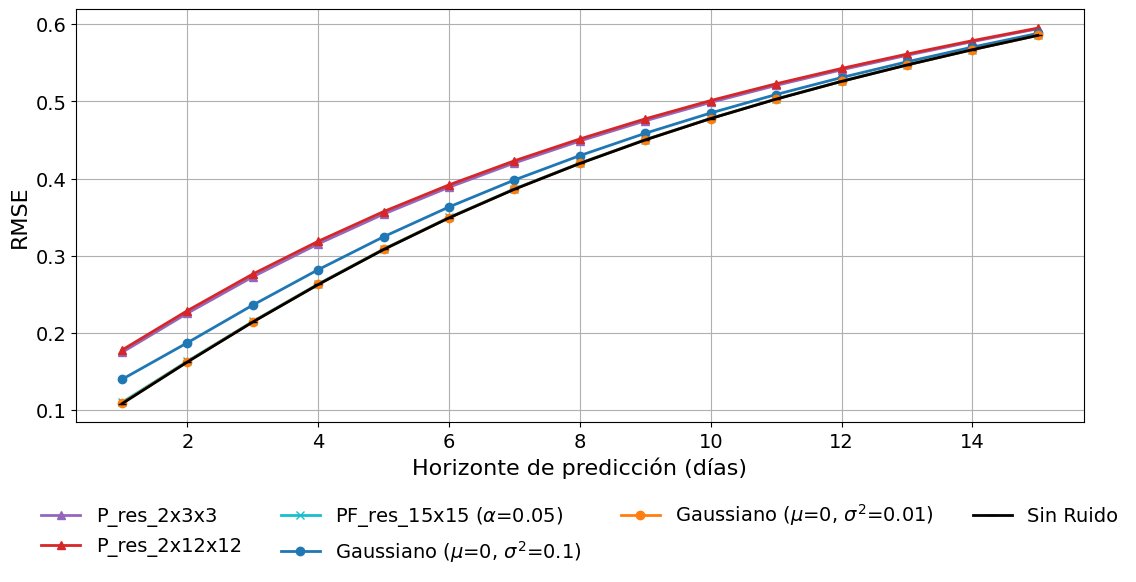

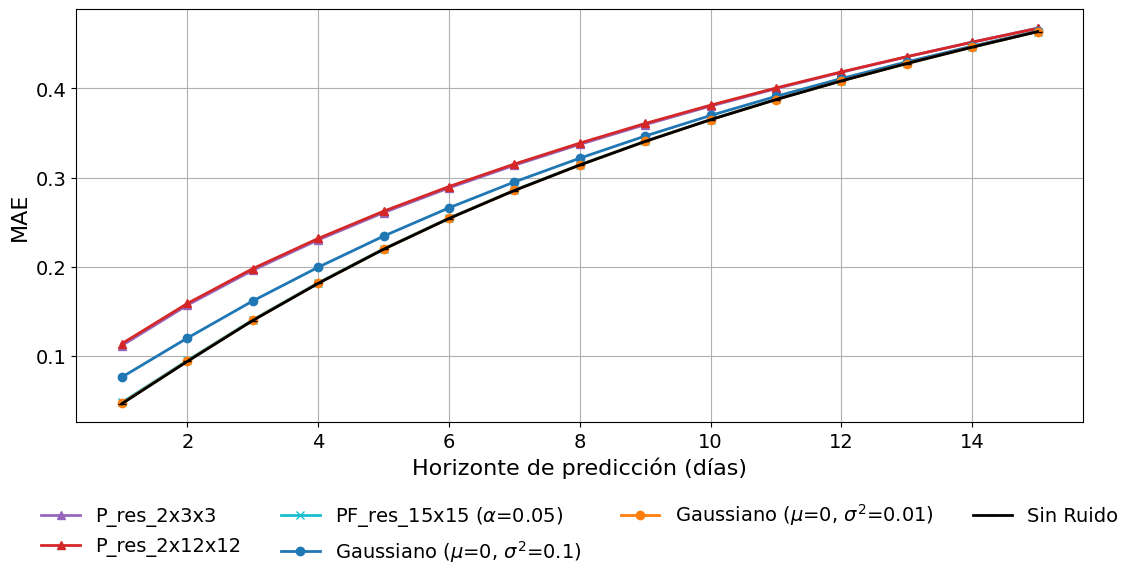

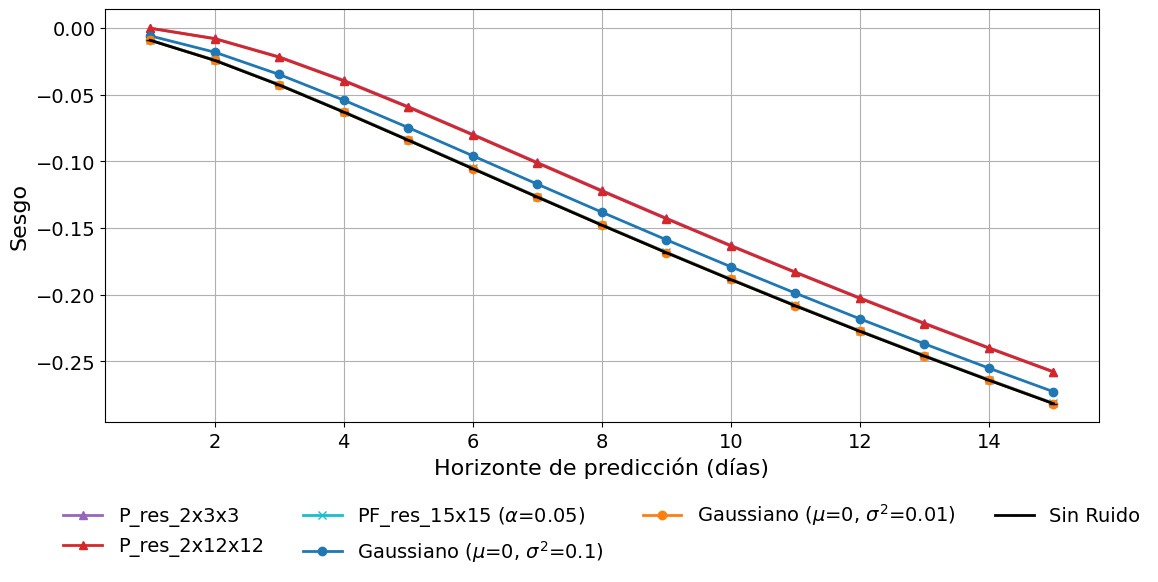

In [7]:
metric_names = ['rmse.sst_temperature', 'mae.sst_temperature', 'bias.sst_temperature']

lead_days = dataset_metrics_perlin_3d_3_3["lead_time"].dt.days

for metric in metric_names:
    plt.figure(figsize=(12, 6))

    plt.plot(
        lead_days,
        dataset_metrics_perlin_3d_3_3[metric].mean(dim="init_time"),
        label="P_res_2x3x3",
        marker='^',
        color="#9467bd",
        linewidth=2
    )

    plt.plot(
        lead_days,
        dataset_metrics_perlin_3d_12_12[metric].mean(dim="init_time"),
        label="P_res_2x12x12",
        marker='^',
        color="#d62728",
        linewidth=2
    )

    plt.plot(
        lead_days,
        dataset_metrics_perlin_fractal_2d_005[metric].mean(dim="init_time"),
        label=r"PF_res_15x15 ($\alpha$=0.05)",
        marker='x',
        color="#17becf",
        linewidth=2
    )
    
    plt.plot(
        lead_days,
        dataset_metrics_gaussian[metric].mean(dim="init_time"),
        label="Gaussiano ($\mu$=0, $\sigma^2$=0.1)",
        marker='o',
        color="#1f77b4",
        linewidth=2
    )
    
    plt.plot(
        lead_days,
        dataset_metrics_gaussian_01[metric].mean(dim="init_time"),
        label="Gaussiano ($\mu$=0, $\sigma^2$=0.01)",
        marker='o',
        color="#ff7f0e",
        linewidth=2
    )

    plt.plot(
        lead_days,
        dataset_metrics_without_noise[metric].mean(dim="init_time"),
        label="Sin Ruido",
        marker='_',
        color="#000000",
        linewidth=2
    )


    plt.xlabel("Horizonte de predicción (días)", fontsize=16)
    plt.ylabel(dict_metric_names[metric], fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(
        fontsize=14,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=4,
        frameon=False
    )
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"metrics/real_test/5_ens_det_{metric.replace('.', '_')}.png", dpi=300)
    plt.show()

### Tabla de métricas para lead time d=1, d=5 y d=15

In [6]:
selected_leads = [0, 4, 14]

summary_data = []

datasets = {
    "Sin ruido": dataset_metrics_without_noise,
    "Gaussiano ($\\sigma^2$=0.1)": dataset_metrics_gaussian,
    "Gaussiano ($\\sigma^2$=0.01)": dataset_metrics_gaussian_01,
    "P_res_2x3x3": dataset_metrics_perlin_3d_3_3,
    "P_res_2x12x12": dataset_metrics_perlin_3d_12_12,
    "PF_res_1x3x3": dataset_metrics_perlin_fractal,
    "PF_res_15x15 ($\\alpha=0.05$)": dataset_metrics_perlin_fractal_2d_005,
}


for name, ds in datasets.items():
    for metric in metric_names:
        for day in selected_leads:
            value = ds[metric].isel(lead_time=day).mean(dim="init_time").item()
            summary_data.append({
                "Ruido": name,
                "Métrica": dict_metric_names[metric],
                "Lead Time": day,
                "Valor": round(value, 4)
            })

df_summary = pd.DataFrame(summary_data)

df_pivot = df_summary.pivot_table(
    index=["Ruido", "Métrica"],
    columns="Lead Time",
    values="Valor"
)

print(df_pivot)

Lead Time                                 0       4       14
Ruido                        Métrica                        
Gaussiano ($\sigma^2$=0.01)  MAE      0.0474  0.2200  0.4637
                             RMSE     0.1092  0.3084  0.5855
                             Sesgo   -0.0090 -0.0839 -0.2816
Gaussiano ($\sigma^2$=0.1)   MAE      0.0767  0.2346  0.4641
                             RMSE     0.1401  0.3248  0.5880
                             Sesgo   -0.0057 -0.0746 -0.2727
PF_res_15x15 ($\alpha=0.05$) MAE      0.0484  0.2204  0.4637
                             RMSE     0.1103  0.3088  0.5856
                             Sesgo   -0.0090 -0.0837 -0.2814
PF_res_1x3x3                 MAE      0.0809  0.2281  0.4656
                             RMSE     0.1439  0.3166  0.5879
                             Sesgo   -0.0092 -0.0839 -0.2810
P_res_2x12x12                MAE      0.1142  0.2625  0.4673
                             RMSE     0.1781  0.3574  0.5949
                        

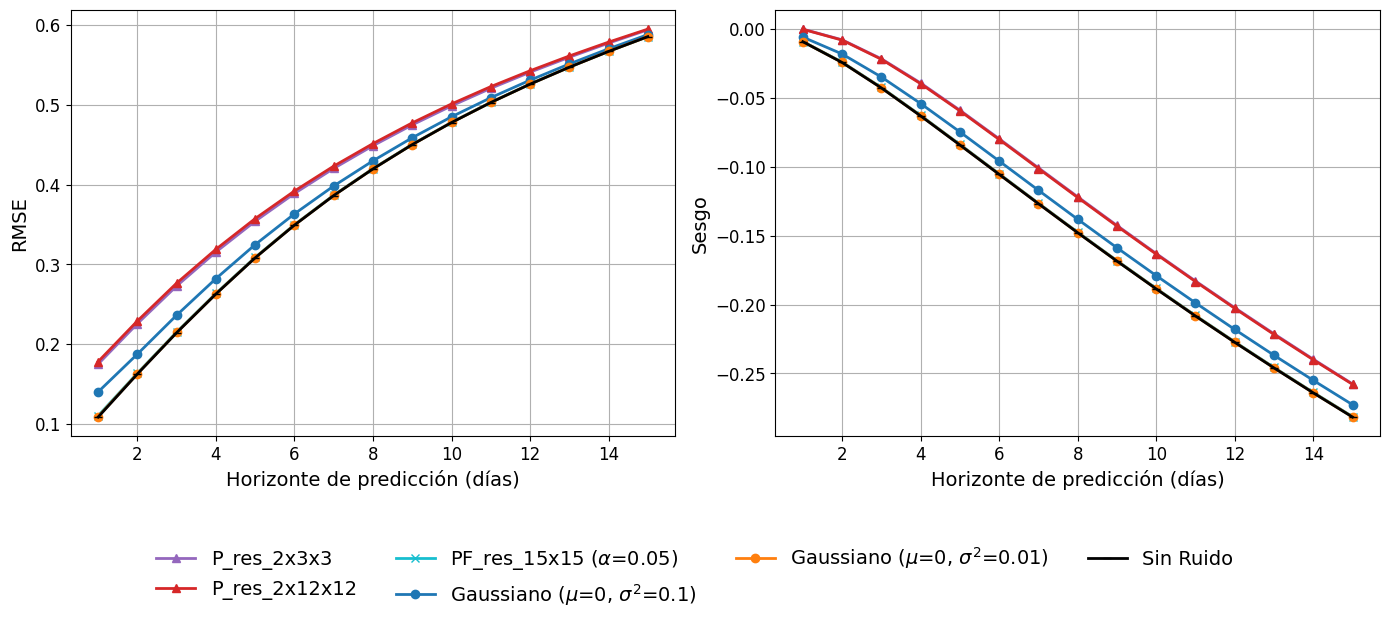

In [7]:
import matplotlib.pyplot as plt

metrics_to_plot = ['rmse.sst_temperature', 'bias.sst_temperature']
lead_days = dataset_metrics_perlin_3d_3_3["lead_time"].dt.days

labels = [
    "P_res_2x3x3",
    "P_res_2x12x12",
    r"PF_res_15x15 ($\alpha$=0.05)",
    r"Gaussiano ($\mu$=0, $\sigma^2$=0.1)",
    r"Gaussiano ($\mu$=0, $\sigma^2$=0.01)",
    "Sin Ruido"
]
colors = [
    "#9467bd",
    "#d62728",
    "#17becf",
    "#1f77b4",
    "#ff7f0e",
    "#000000"
]
markers = ['^', '^', 'x', 'o', 'o', "_"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    
    datasets = [
        dataset_metrics_perlin_3d_3_3,
        dataset_metrics_perlin_3d_12_12,
        dataset_metrics_perlin_fractal_2d_005,
        dataset_metrics_gaussian,
        dataset_metrics_gaussian_01,
        dataset_metrics_without_noise
    ]
    
    for ds, label, color, marker in zip(datasets, labels, colors, markers):
        ax.plot(
            lead_days,
            ds[metric].mean(dim="init_time"),
            label=label,
            color=color,
            marker=marker,
            linewidth=2,
            linestyle='-'
        )
    
    ax.set_xlabel("Horizonte de predicción (días)", fontsize=14)
    ax.set_ylabel(dict_metric_names[metric], fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='lower center',
    ncol=4,
    fontsize=14,
    frameon=False,
    bbox_to_anchor=(0.5, -0.05)
)

plt.tight_layout(rect=[0, 0.15, 1, 1])

fig.savefig("metrics/real_test/rmse_bias_combined.svg", format='svg', bbox_inches='tight')

plt.show()